<a href="https://colab.research.google.com/github/mbaliu-treino/Desenvolve/blob/main/LEARN_C_DataScience_Pandas_Tratamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=tomato>**PANDAS PARA DATA SCIENCE - Tratamento de dados**</font>

<a href=https://colab.research.google.com/drive/1cu2HTTnXRrOua6r1KviOMSd1wviABwb8><font color=gray size=2>Arquivo Colab</font></a>

<ul><font size=2 color=gray>FICHA TÉCNICA
<li><a href=https://cursos.alura.com.br/course/introducao-python-pandas><font size=2 color=gray>Python Pandas: tratando e analisando dados</a>
<li>Carga Horária: 12 h
<li>Instrutora: Rodrigo Fernando Dias
<li>Data de Início: fev. de 2022
</ul>

<hr color=gray><br>
<h3><b>Conteúdo / Aprendizagem:</b></h3>

- Obtenção de dados
- Criando estruturas de dados com Pandas
- Filtrando dados
- Frequências
- Tratando dados faltantes
- Estatística descritiva
- Outliers

# <font color=orange>RESUMO</font>

<a href=https://docs.google.com/spreadsheets/d/1tTygYlq9r7nkUsw9a25N5_z57-de_59tSBCIVPw6KUw><font size=2 color=gray>ROTEIROS Data Science</font></a>

* <font color=orange><b>

* 

# <font color=orange>CURSO</font>


Fomos contratados por uma seguradora que nos forneceu uma base de dados para executarmos um trabalho de inteligência. A base contém milhares de imóveis disponíveis para locação no Rio de Janeiro. Precisamos realizar a importação dos dados para utilizá-los no Pandas.

In [ ]:
!mkdir dados

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd

# A. Carregando os dados

Primeiro iremos investigar como os dados foram armazenados. As propriedades que nos interessa agora é:

- seperador de dados;
- separador decimal;
- encoding.

# Relatório de Análise I 

## Importando a Base de Dados

In [ ]:
# VERIFICANDO ARQUIVO
with open('dados/aluguel.csv') as f:
    print(f.readline())
    print(f.readline())

﻿Tipo;Bairro;Quartos;Vagas;Suites;Area;Valor;Condominio;IPTU

Quitinete;Copacabana;1;0;0;40;1700;500;60



In [ ]:
# Separador - ;
# Decimal - sem números decimais
# Encoding - 

In [ ]:
# Loading file
dados = pd.read_csv('dados/aluguel.csv', sep=';')

## Informações Gerais sobre a Base de Dados

In [ ]:
# DataFrame shape
df_shape = dados.shape
print(f'A base de dados apresenta {df_shape[0]} registros (imóveis) e {df_shape[1]} variáveis')
print(df_shape)

A base de dados apresenta 32960 registros (imóveis) e 9 variáveis
(32960, 9)


In [ ]:
# Informações
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [ ]:
tipos_de_dados = pd.DataFrame(dados.dtypes, columns=['Tipos de Dados'])

In [ ]:
tipos_de_dados.columns.name = 'Variáveis'
tipos_de_dados

Variáveis,Tipos de Dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


# Relatório de Análise II

## Tipos de Imóveis

A base de dados possui registros de diversos tipos de imóveis, identificadas pela coluna `tipo`. O nosso cliente deseja operar focado em somente um segmento desses imóveis.

Desata forma, a equipe de análise de dados deverá separar o segmento de imóveis residenciais para ser apresentado para o cliente.

In [ ]:
# Coluna de tipos
tipo_de_imovel = dados['Tipo']

In [ ]:
type(tipo_de_imovel)

pandas.core.series.Series

In [ ]:
# Obtenção dos valores únicos
tipo_de_imovel.drop_duplicates(inplace=True)

In [ ]:
# Obtenção dos valores únicos - forma mais objetiva
dados['Tipo'].unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

## Organizando a Visualização

In [ ]:
# Criação de DataFrame
tipo_de_imovel = pd.DataFrame(tipo_de_imovel)
tipo_de_imovel

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
7,Casa de Condomínio
16,Prédio Inteiro
17,Flat
29,Loja/Salão
80,Galpão/Depósito/Armazém
83,Casa Comercial


In [ ]:
# Visualização do Index
tipo_de_imovel.index

Int64Index([    0,     1,     2,     3,     7,    16,    17,    29,    80,
               83,   117,   159,   207,   347,   589,  2157,  3354,  4379,
             4721,  6983,  9687, 23614],
           dtype='int64')

In [ ]:
range(tipo_de_imovel.shape[0])

range(0, 22)

In [ ]:
# Alteração do Index
tipo_de_imovel.index = range(tipo_de_imovel.shape[0])
tipo_de_imovel.columns.name = 'id'
tipo_de_imovel

id,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


# Relatório de Análise III

## Imóveis residenciais

In [ ]:
list(dados['Tipo'].unique())

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

In [ ]:
# Definição dos imóveis residenciais
tipos_residencial = ['Quitinete',
 'Casa',
 'Apartamento',
 'Casa de Condomínio',
 'Casa de Vila',
 ]

In [ ]:
seletor = dados['Tipo'].isin(tipos_residencial)
dados_residencial = dados[seletor]
dados_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
dados_residencial['Tipo'].unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio',
       'Casa de Vila'], dtype=object)

In [ ]:
# Correção do Index
dados_residencial.index = range(dados_residencial.shape[0])
dados_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


## Exportando Imóveis Residenciais

In [ ]:
dados_residencial.to_csv('dados/aluguel_residencial.csv', sep=';', index=False)

# Relatório de Análise IV

1. Selecione somente os imóveis classificados com tipo 'Apartamento'
2. Selecione os imóveis classificados com tipos 'Casa', 'Casa de Condomínio', e 'Casa de Vila'.
3. Selecione os imóveis com área entre 60 e 100 metros quadrados, incluindo os limites.
4. Selecione os imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00

## Seleções e Frequências

In [ ]:
import pandas as pd
dados = pd.read_csv('/content/dados/aluguel_residencial.csv', sep=';')

In [ ]:
# Selecione somente os imóveis classificados com tipo 'Apartamento'
seletor = dados['Tipo'] == 'Apartamento'
q1 = dados[seletor]
q1.shape[0]

19532

In [ ]:
# Selecione os imóveis classificados com tipos 'Casa', 'Casa de Condomínio', e 'Casa de Vila'.
# seletor = dados['Tipo'].isin(['Casa', 'Casa de Condomínio',  'Casa de Vila'])
seletor = (dados['Tipo'] == 'Casa') | (dados['Tipo'] == 'Casa de Condomínio') | (dados['Tipo'] == 'Casa de Vila')
q2 = dados[seletor]
q2.shape[0]

2212

In [ ]:
%%timeit -n 1000
(dados['Tipo'] == 'Casa') | (dados['Tipo'] == 'Casa de Condomínio') | (dados['Tipo'] == 'Casa de Vila')

1000 loops, best of 5: 3.84 ms per loop


In [ ]:
%%timeit -n 1000
dados['Tipo'].isin(['Casa', 'Casa de Condomínio',  'Casa de Vila'])

1000 loops, best of 5: 1.39 ms per loop


In [ ]:
%%timeit -n 1000
dados.query('Tipo == "Casa" or Tipo == "Casa de Condomínio" or Tipo == "Casa de Vila"')

1000 loops, best of 5: 4.08 ms per loop


In [ ]:
# Selecione os imóveis com área entre 60 e 100 metros quadrados, incluindo os limites.
#  60 <= Area <= 100
seletor = (60 <= dados['Area']) & (dados['Area'] <= 100)
q3 = dados[seletor]
q3.shape[0]

8719

In [ ]:
# Selecione os imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00
seletor = (dados['Quartos'] >= 4) & (dados['Valor'] < 2000)
q4 = dados[seletor]
q4.shape[0]

41

In [ ]:
# RESUMO
print(f"""
Nº de imóveis classificados com tipo 'Apartamento' -> {q1.shape[0]}
Nº de imóveis classificados com tipos 'Casa', 'Casa de Condomínio', e 'Casa de Vila' -> {q2.shape[0]}
Nº de imóveis com área entre 60 e 100 metros quadrados, incluindo os limites -> {q3.shape[0]}
Nº de imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00 -> {q4.shape[0]}
""")


Nº de imóveis classificados com tipo 'Apartamento' -> 19532
Nº de imóveis classificados com tipos 'Casa', 'Casa de Condomínio', e 'Casa de Vila' -> 2212
Nº de imóveis com área entre 60 e 100 metros quadrados, incluindo os limites -> 8719
Nº de imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00 -> 41



# Relatório de Análise V

## Tratamento de Dados Faltantes

Diversos campos possuem <font color=tomato>**dados faltantes**</font>. Para diversos métodos de análises, esses valores podem prejudicar o resultado. Por tanto é necessários que medidas sejam tomadas para evitar esse tipo de problema.

In [ ]:
dados.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
22575,False,False,False,False,False,False,False,False,False
22576,False,False,False,False,False,False,False,False,False
22577,False,False,False,False,False,False,False,False,False
22578,False,False,False,False,False,False,False,False,False


In [ ]:
dados.notnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,False,False
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...
22575,True,True,True,True,True,True,True,True,True
22576,True,True,True,True,True,True,True,True,True
22577,True,True,True,True,True,True,True,True,True
22578,True,True,True,True,True,True,True,True,True


In [ ]:
# Investigação de dados faltantes por coluna
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22580 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22580 non-null  object 
 1   Bairro      22580 non-null  object 
 2   Quartos     22580 non-null  int64  
 3   Vagas       22580 non-null  int64  
 4   Suites      22580 non-null  int64  
 5   Area        22580 non-null  int64  
 6   Valor       22571 non-null  float64
 7   Condominio  20765 non-null  float64
 8   IPTU        15795 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


In [ ]:
# Visualiza os registros com 'VALOR' nulo
dados[dados['Valor'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
58,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
1492,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
1683,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2012,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2034,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
4941,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
8568,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
8947,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0
9149,Apartamento,Gávea,3,1,1,105,NaN,880.0,221.0


### Remoção dos Registros

In [ ]:
# REMOÇÃO DOS REGISTROS
A = dados.shape[0]
dados.dropna(subset=['Valor'], inplace=True)
B = dados.shape[0]
A - B

0

### Tratamento Condicional

Temos as variáveis Condomínio e IPTU com alguns problemas. No caso de Condominio, os dados nulos nem sempre são incorretos, afinal no caso de uma casa, realmente não há esse tipo de tarifa. Para este caso, devemos considerar a variável Tipo: caso o imóvel seja um apartamento, os dados nulos serão excluídos.

In [ ]:
# Identificação dos registros nulos em 'Condominio'
dados[dados['Condominio'].isnull()].shape[0]

1813

In [ ]:
# Remoção condicional - método de inversão de seleção
seletor = (dados['Tipo'] == 'Apartamento') & (dados['Condominio'].isnull())
dados = dados[~seletor]
dados.shape[0]

21826

In [ ]:
# PREENCHE VALORES NULOS
# dados.fillna(0, inplace=True)
dados.fillna({'Condominio': 0, 'IPTU':0}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21826 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        21826 non-null  object 
 1   Bairro      21826 non-null  object 
 2   Quartos     21826 non-null  int64  
 3   Vagas       21826 non-null  int64  
 4   Suites      21826 non-null  int64  
 5   Area        21826 non-null  int64  
 6   Valor       21826 non-null  float64
 7   Condominio  21826 non-null  float64
 8   IPTU        21826 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [ ]:
dados.to_csv('dados/aluguel_residencial_nonnull.csv', sep=';', index=False)

# Relatório de Análise VI

## Criação de Novas Features

Recebemos uma nova demanda da seguradora: 
1. precisamos criar novas variáveis para o conjunto de dados. Um das variáveis abrigará o **valor bruto** do aluguel; outra que armazena o valor com base no metro quadrado de um imóvel 
2. e, por fim, uma nova variável de tipo que agregue casas e apartamentos.

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/dados/aluguel_residencial_nonnull.csv', sep=';')

In [ ]:
# VARIÁVEL 'VALOR BRUTO'
dados['Valor Bruto'] = dados['Valor'] + dados['IPTU'] + dados['Condominio']

In [ ]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0


In [ ]:
# VARIÁVEL 'Valor m²'
dados['Valor m2'] = dados['Valor'] / dados['Area']

In [ ]:
dados['Valor m2'] = dados['Valor m2'].round(2)

In [ ]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00


In [ ]:
dados['Valor Bruto m2'] = (dados['Valor Bruto'] / dados['Area']).round(2)
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36


In [ ]:
# VARIÁVEL CATEGÓRICA
casa = ['Casa', 'Casa de Condomínio', 'Casa de Vila']

dados['Tipo Agregado'] = dados['Tipo'].apply(lambda x: 'Casa' if x in casa else 'Apartamento')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0,12.86,20.54,Apartamento
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,29.63,43.52,Apartamento
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,23.08,33.85,Apartamento
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,29.17,40.54,Apartamento


In [ ]:
# VARIÁVEL CATEGÓRICA
# casa = ['Casa', 'Casa de Condomínio', 'Casa de Vila']

# dados['Tipo Agregado'] = dados['Tipo'].map()
# dados.head()

## Excluindo Variáveis

In [ ]:
dados_aux = dados[:]

In [ ]:
del dados_aux['Valor Bruto']
dados_aux.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Valor Bruto m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,56.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,80.67,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,21.46,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,32.36,Apartamento


In [ ]:
dados_aux.pop('Valor Bruto m2')

0        56.50
1        70.00
2        80.67
3        21.46
4        32.36
         ...  
21821    20.54
21822    43.52
21823    33.85
21824    40.54
21825    53.71
Name: Valor Bruto m2, Length: 21826, dtype: float64

In [ ]:
dados_aux.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


In [ ]:
dados_aux.drop(['Bairro', 'Tipo'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dados_aux.head()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


# Relatório de Análise VII

## Agrupamento

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('/gdrive/MyDrive/Projetos/LEARNING/DADOS/aluguel_residencial_nonnull.csv', sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0


In [ ]:
grupo_bairro = dados.groupby('Bairro')
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Abolição,1195.33,191.40
Alto da Boa Vista,3966.67,885.00
Anchieta,875.00,19.75
Andaraí,1464.71,497.71
Anil,2048.87,455.85
...,...,...
Vila Valqueire,1769.58,276.88
Vila da Penha,1260.58,232.68
Vista Alegre,1114.38,210.06


### Estatística Descritiva

In [ ]:
grupo_bairro['Valor'].describe().round(2).loc[
    ['Barra da Tijuca','Botafogo', 'Copacabana', 'Flamengo', 'Ipanema', 'Leblon', 'Tijuca']]

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


A análise do quadro de descrição estatística nos permite observar alguns comportamentos que podem indicar algumas inconsistências na base ou comportamentos exóticos.

Por exemplo, o valor máximo de aluguel em Botafogo seria 4,5 milhões, um valor que o conhecimento no negócio indicaria ser impraticável. Da mesma maneira o Desvio Padrão também é muito grande.

In [ ]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(
    columns={'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Abolição,800.0,2300.0
Alto da Boa Vista,600.0,15000.0
Anchieta,700.0,1000.0
Andaraí,700.0,2950.0
Anil,300.0,7000.0
...,...,...
Vila Valqueire,800.0,16000.0
Vila da Penha,450.0,4500.0
Vista Alegre,700.0,1400.0


### Visualização

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20,10))

Text(0, 0.5, 'Valor do Aluguel')

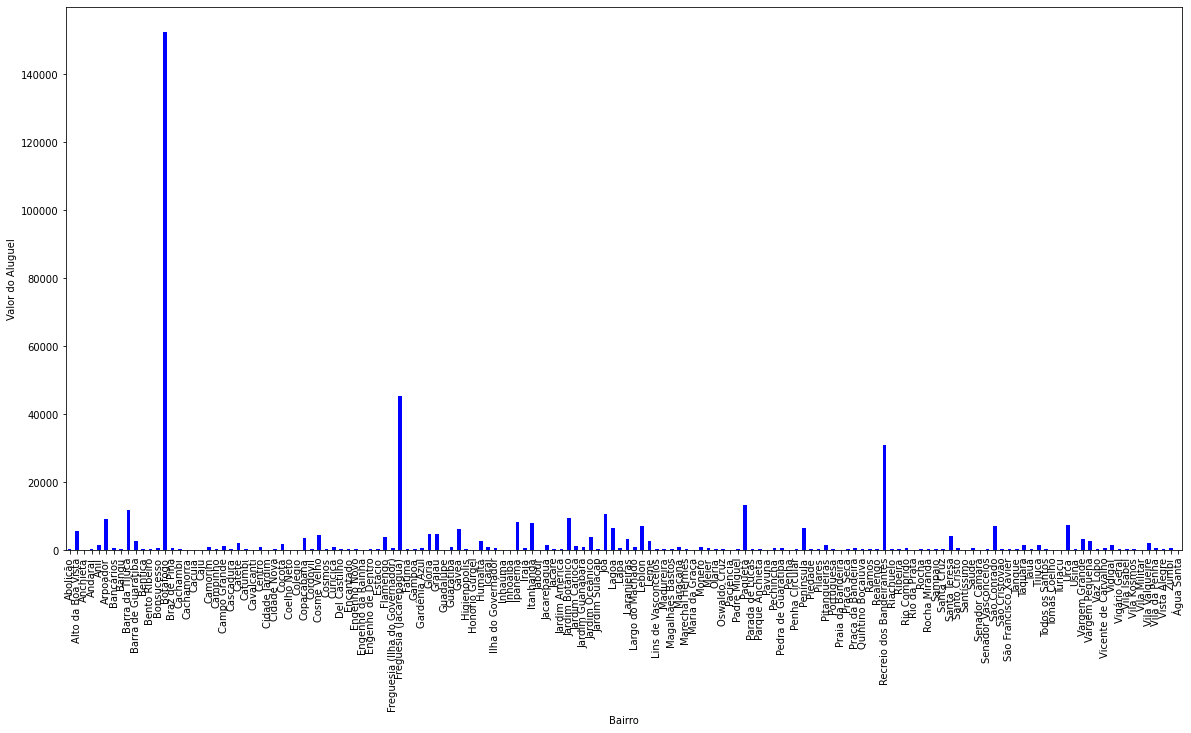

In [ ]:
fig = grupo_bairro['Valor'].std().plot.bar(color='blue')
fig.set_title('')
fig.set_ylabel('Valor do Aluguel')

Este gráfico desmonstra um problema na VARIAÇÃO dos dados, sendo elas muito discrepantes entre si.

Text(0, 0.5, 'Valor do Aluguel')

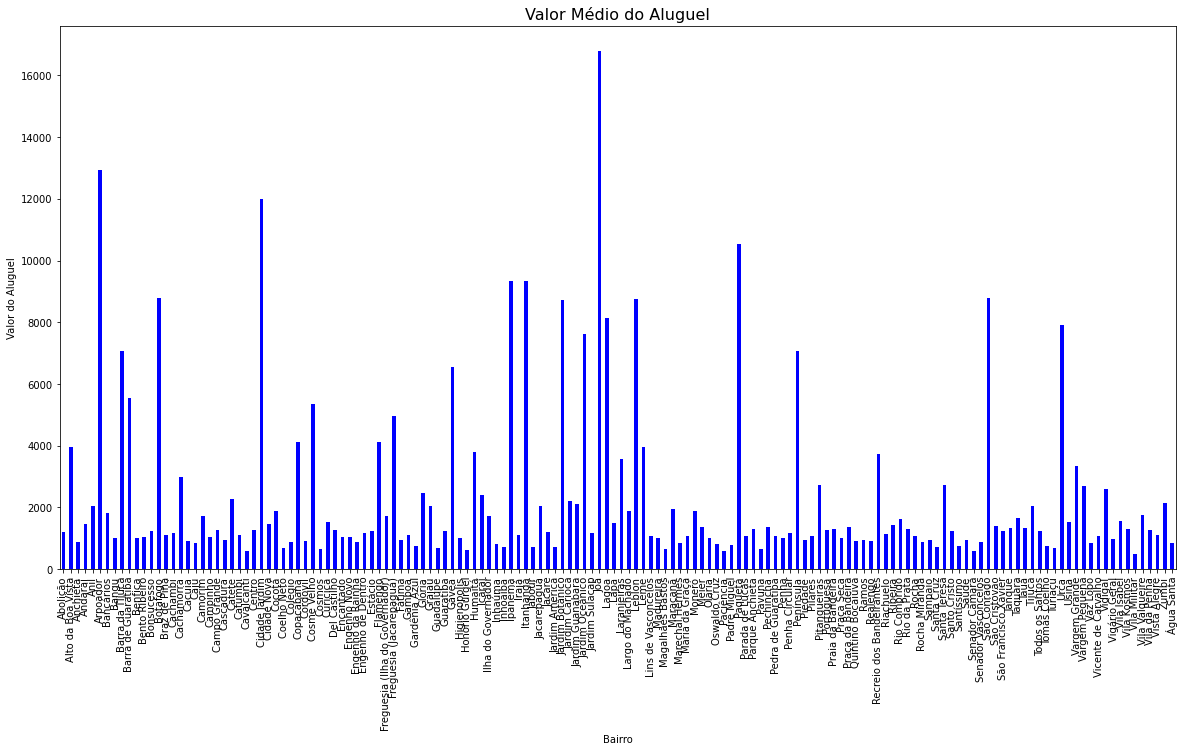

In [ ]:
fig = grupo_bairro['Valor'].mean().plot.bar(color='blue')
fig.set_title('Valor Médio do Aluguel', fontsize=16)
fig.set_ylabel('Valor do Aluguel');

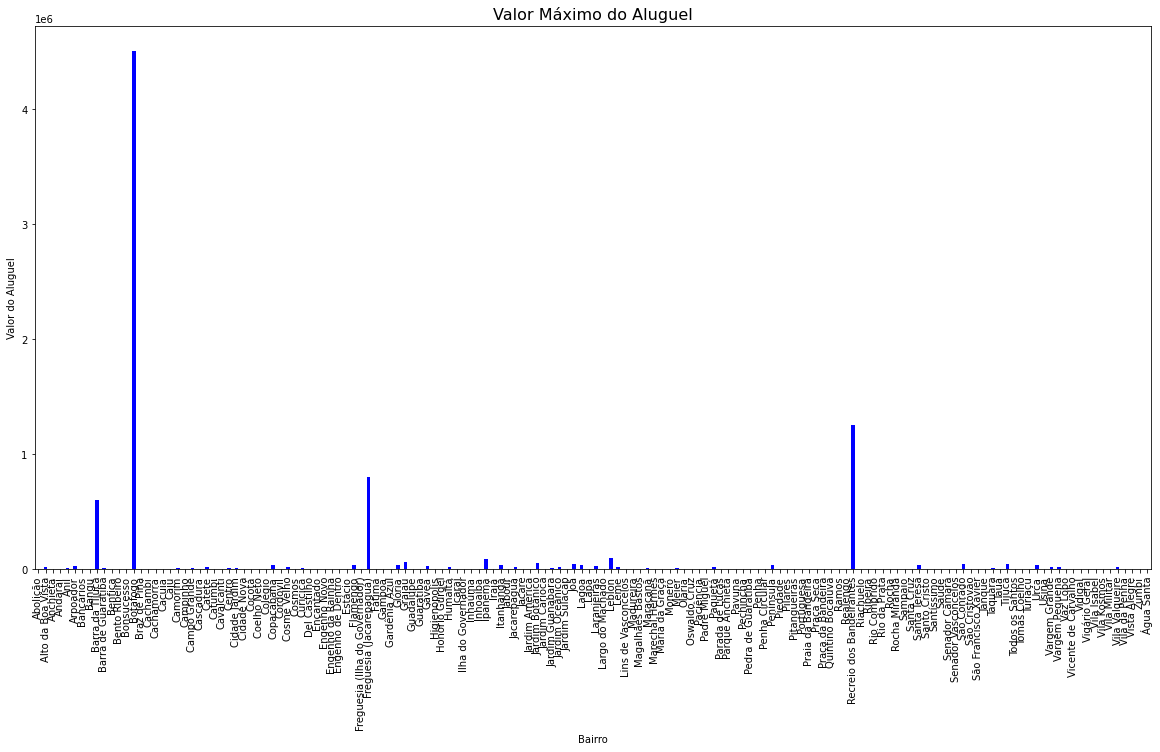

In [ ]:
fig = grupo_bairro['Valor'].max().plot.bar(color='blue')
fig.set_title('Valor Máximo do Aluguel', fontsize=16)
fig.set_ylabel('Valor do Aluguel');

# Indica alguns problemas em alguns elementos do conjunto.

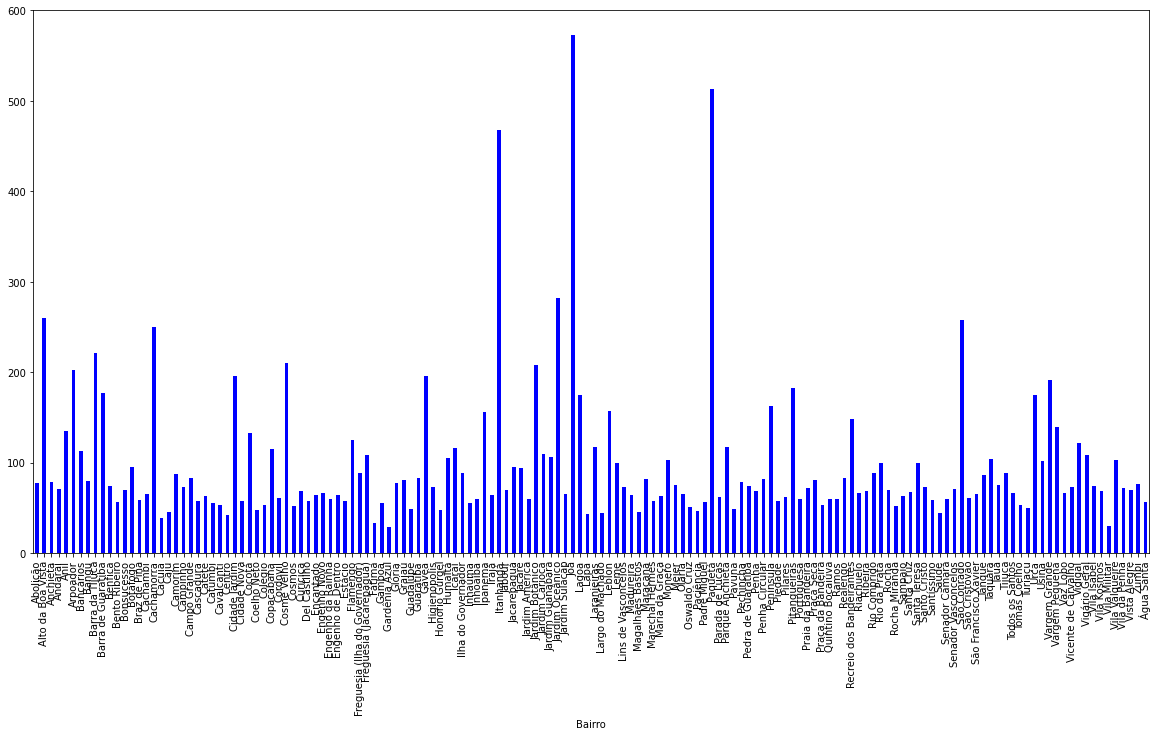

In [ ]:
fig = grupo_bairro['Area'].mean().plot.bar(color='blue')
# fig.set_title('Valor Médio do Aluguel', fontsize=16)
# fig.set_ylabel('Valor do Aluguel');

## Relatório de Análise VIII

### Identificando Outliers

A análise dos Outliers é importante para que se identifique:

1. **Dados inconsistentes**, que não podem condizer com fenomenos reais (<font color=tomato>Estes dados devem ser removidos das anáilises</font>).
2. **Dados discrepantes**: são dados que estão muito dispersos da concentração do restante do conjunto de dados. Neste caso, os dados forma considerados plausíveis, por tanto eles não devem ser excluídos. Neste caso, deve-se considerar <font color=tomato>analisa-los com outras variáveis</font> ou <font color=tomato>criar um outro grupos</font> para analisa-los separadamente (imóveis de alto-padrão).

#### Outliers: Boxplot

Um método de identificação dos [Outliers](https://en.wikipedia.org/wiki/Interquartile_range) é através do `boxplot`. Este método utilizado do IIQ (intervalo interquantil, ou no inglês, IQR: Interquantile Range).

Os outliers podem ser identificado pelos <font color=tomato>**limites internos**</font> (IIQ * 1.5) e o <font color=tomato>**limites externos**</font> (IIQ * 3). Os pontos entre os limites são os outliers leves, os que estão além do limite externos são os outliers extremos.

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(14,6))

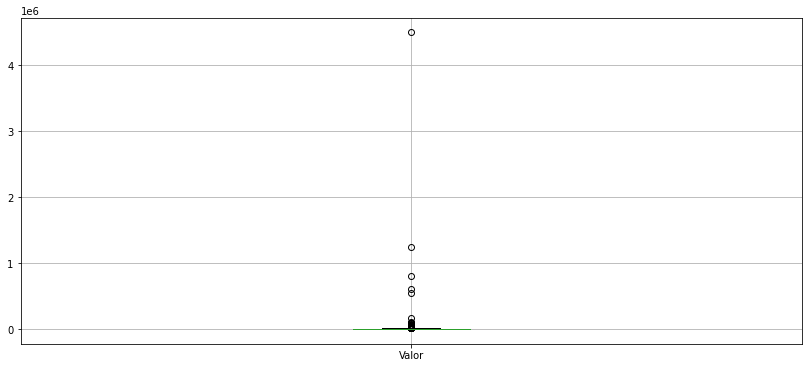

In [ ]:
dados.boxplot('Valor')

Os dados discrepantes prejudicam a visualização da variável.

In [ ]:
# Dados Discrepantes
seletor = dados['Valor'] >=  500000
dados[seletor]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0


In [ ]:
valor = dados['Valor']

In [ ]:
# OUTLIERS - Método do IIQ
Q1 = valor.quantile(0.25)
Q3 = valor.quantile(0.75)
IIQ  = Q3 - Q1
limite_inferior = Q1 - IIQ*1.5
limite_superior = Q3 = IIQ*1.5

In [ ]:
seletor = (valor >= limite_inferior) & (valor <= limite_superior)
dados_limpos = dados[seletor]

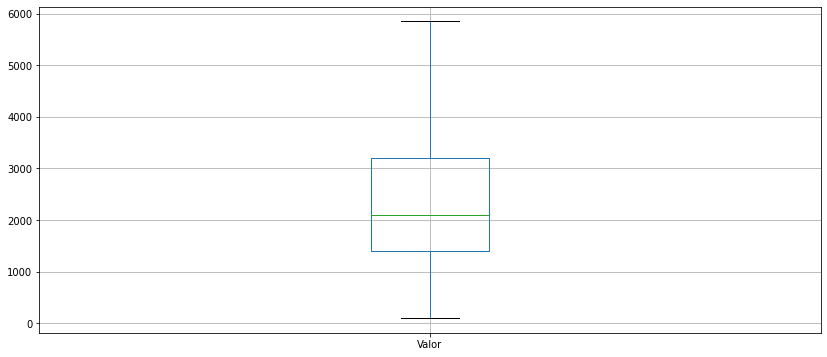

In [ ]:
 dados_limpos.boxplot('Valor')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74a1a43550>]],
      dtype=object)

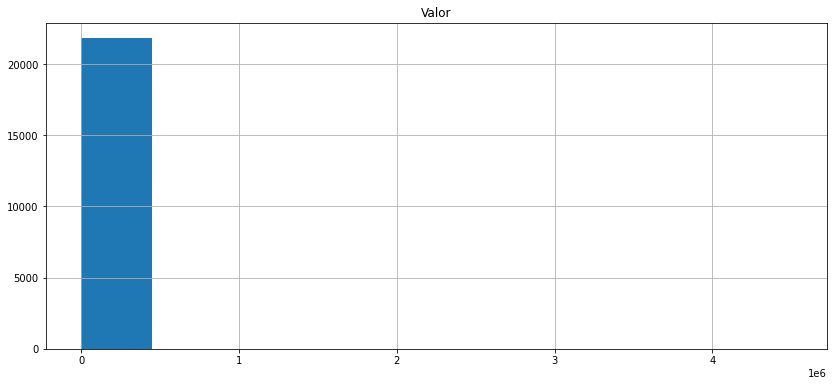

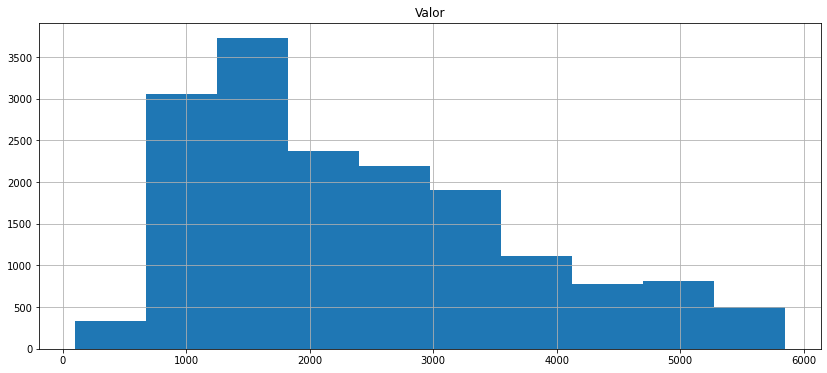

In [ ]:
dados.hist('Valor')
dados_limpos.hist('Valor')